# BERT

Nesse projeto será treinado um modelo do BERT

Primeiramente será verificado a distribuição de palavras dos textos para a preparação da tokenização

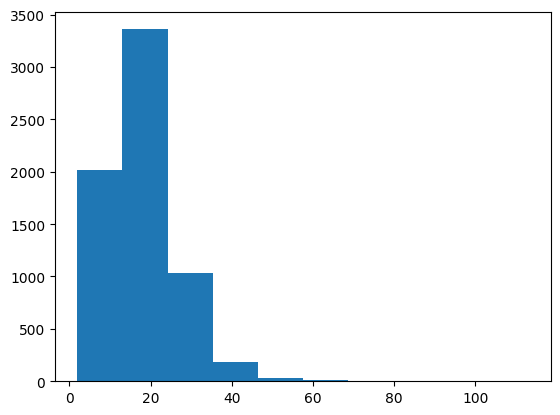

In [ ]:
import matplotlib.pyplot as plt
import pandas as p

# Take the training file
f = open("train.csv", "r")
temp = p.read_csv(f)
trainX, trainY = temp.iloc[:, -3], temp.iloc[:, -1]
f.close()

# get length of all the messages in the train set
seq_len = [len(i.split()) for i in trainX]

plt.hist(p.Series(seq_len))
plt.show()

Com o dado observado, foi definido o parâmetro para a quantidade de palavras em cada sentença. Com isso será feito treinamento do modelo com o código a baixo 

In [1]:
import BERT
from tqdm.notebook import tqdm
import torch

for epoch in tqdm(range(1, BERT.epochs+1)):
    
    BERT.model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(BERT.dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        BERT.model.zero_grad()
        
        batch = tuple(b.to(BERT.device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = BERT.model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(BERT.model.parameters(), 1.0)

        BERT.optimizer.step()
        BERT.scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/home/gabriel/GitHub/Project-NLP/sklearn-env/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2681: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/home/gabriel/GitHub/Project-NLP/sklearn-env/lib/python3.11/site-

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 2:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 3:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 4:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 5:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 6:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 7:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 8:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 9:   0%|          | 0/208 [00:00<?, ?it/s]

Epoch 10:   0%|          | 0/208 [00:00<?, ?it/s]

Para avaliar o modelo desenvolvido, podem ser observadas algumas métricas como:

## Acurácia:

In [2]:
_, predictions, true_vals = BERT.evaluate(BERT.model, BERT.device, BERT.dataloader_test)
BERT.accuracy_per_class(predictions, true_vals)

Accuracy: 119/150

Accuracy: 116/150

Accuracy: 39/150

Accuracy: 121/150

Accuracy: 112/150

Accuracy: 244/300

Accuracy: 137/150

Accuracy: 139/150

Accuracy: 95/150

Accuracy: 110/150

Accuracy: 104/150

Accuracy: 112/150

Accuracy: 91/150

Accuracy: 76/150

Accuracy: 128/150

Accuracy: 121/150

Accuracy: 8/150

Accuracy: 93/150



## Matriz de confusão:

<Axes: >

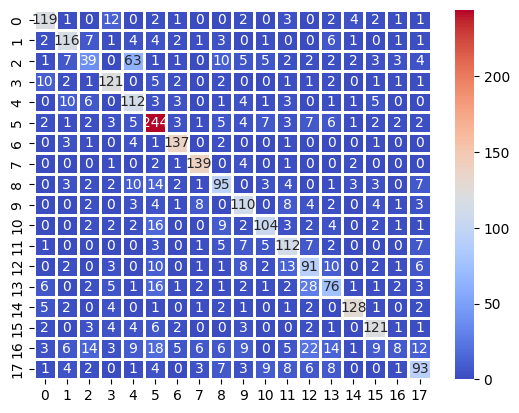

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Matriz de confusão
cf_matrix = confusion_matrix(true_vals, BERT.np.argmax(predictions, axis=1).flatten())

# Criando o heatmap
sns.heatmap(cf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')

## F1 - Score

In [16]:
from sklearn.metrics import f1_score

print("Micro: ", f1_score(true_vals, BERT.np.argmax(predictions, axis=1).flatten(), average="micro"))
print("Macro: ", f1_score(true_vals, BERT.np.argmax(predictions, axis=1).flatten(), average="macro"))

Micro:  0.6894736842105263
Macro:  0.6673192992927988
